In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city"])


# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [7]:
# my analysis for the Data...to be used in the rest of my work

city_type=city_ride_data['type'].unique()
print('Types')
print(city_type)
print('______________________________________')
city_type_df=pd.DataFrame(city_type)
print(city_type_df)
print('_______________________________________')
city_group=city_ride_data.groupby('city')
city_types=city_group['type'].value_counts()
city_types1=pd.DataFrame(city_types)
print(city_types1.head())
print('_________________________________________')
print('averege fare in all types')
city_group_type=city_ride_data.groupby('type')
city_group_type.count
avg_fare=100*(city_group_type.sum()['fare']/city_ride_data["fare"].sum())
print(avg_fare)
print('_________________________________________')
# print(city_group_type['fare'].sum())
# print('_________________________________________')
print('Total rides')
total_rides=city_group_type['ride_id'].sum()
print(total_rides)
print('_________________________________________')
print('Rural')
rural = city_ride_data[city_ride_data["type"] == "Rural"]
print(rural.head())
print('_________________________________________')
print('Suburban')
suburban= city_ride_data[city_ride_data["type"] == "Suburban"]
print(suburban.head())
print('_________________________________________')
print('Urban')
urban= city_ride_data[city_ride_data["type"] == "Urban"]
print(urban.head())


Types
['Urban' 'Suburban' 'Rural']
______________________________________
          0
0     Urban
1  Suburban
2     Rural
_______________________________________
                        type
city          type          
Amandaburgh   Urban       18
Barajasview   Urban       22
Barronchester Suburban    16
Bethanyland   Suburban    18
Bradshawfurt  Rural       10
_________________________________________
averege fare in all types
type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64
_________________________________________
Total rides
type
Rural        580968240341287
Suburban    3106884522576766
Urban       7919412664056093
Name: ride_id, dtype: int64
_________________________________________
Rural
                 city                 date   fare        ride_id  \
2250   Randallchester  2018-04-13 11:13:31  43.22  1076079536213   
2251      North Holly  2018-02-02 14:54:00  12.42  1985256326182   
2252      Michaelberg  2018-03-27 18:27:34 

In [8]:
# Obtain the x and y coordinates for each of the three city types
# x_axis is total number of rides in each city type
# y_axis is averege fares in each city type
urban_count = urban.groupby(["city"]).count()["ride_id"]
suburban_count = suburban.groupby(["city"]).count()["ride_id"]
rural_count = rural.groupby(["city"]).count()["ride_id"]

urban_avg_fare = urban.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural.groupby(["city"]).mean()["fare"]

# in order to have the right size for the circels we have to find the drivers count
urban_driver_count = urban.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural.groupby(["city"]).mean()["driver_count"]

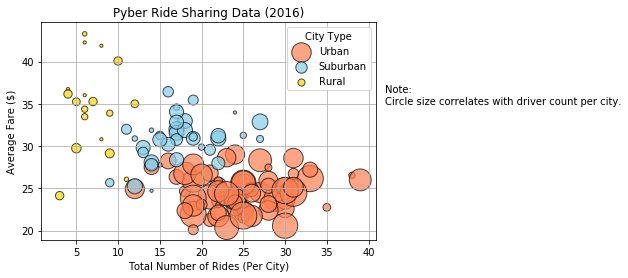

In [9]:
# **************************Bubble Plot of Ride Sharing Data*****************

Urban=plt.scatter(urban_count,
            urban_avg_fare,
             c="coral",s=10*urban_driver_count,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.7, label="Urban")


Suburban=plt.scatter(suburban_count,
            suburban_avg_fare,s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=.7, label="Suburban")



Rural=plt.scatter(rural_count, 
            rural_avg_fare, s=10*rural_driver_count,
            c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=.7, label="Rural")



# labels and title
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# set the grid
plt.grid(True)

# Create a legend

plt.legend(handles=[Urban, Suburban, Rural], loc="best" , title='City Type')

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")


# Save Figure
# plt.savefig("Resources/Fig1.png")


# Show plot
plt.show()

## Total Fares by City Type

In [15]:
# Calculate Type Percents
type_percents = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()

type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

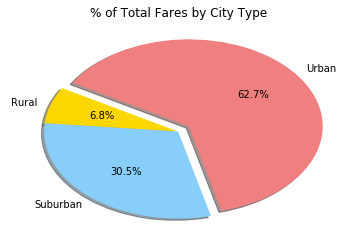

In [16]:
# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")


# Save Figure
#plt.savefig("analysis/Fig2.png")

# Show Figure
plt.show()

## Total Rides by City Type

In [13]:
# Calculate Ride Percents
ride_percents = 100 * city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

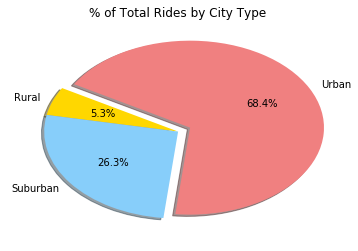

In [14]:
# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")


# Save Figure
#plt.savefig("analysis/Fig3.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [17]:
# Calculate Driver Percents
drivers_percents = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()
drivers_percents


type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

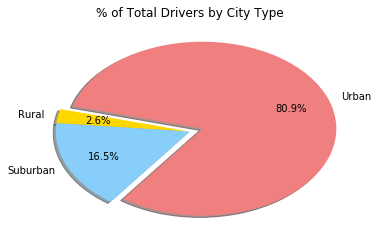

In [18]:
# Build Pie Charts
plt.pie(drivers_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")


# Save Figure
#plt.savefig("analysis/Fig4.png")


# Show Figure
plt.show()